# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
# Set up a new Data Frame to hold the values
cities_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": "",
    "Country": "",
    "Date": "",
    "Humidity": "",
    "Lat": "",
    "Lng": "",
    "Max Temp": "",
    "Wind Speed": ""
})

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,,,,,,,,
1,vaini,,,,,,,,
2,cervo,,,,,,,,
3,busselton,,,,,,,,
4,aripuana,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting statement as example
print("Beginning Data Retrieval")
print("-----------------------------")

# Set API key and create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
   "Units": "Imperial",
    "APPID": wkey,
}

# Create a query url to use cities list data and generate each key items

for index, city in cities_df.iterrows():
    # Get City from df
    city_name = city["City"]
    
    # Add keyword to params dict
    params["q"] = city_name
    
    response = requests.get(base_url, params=params).json()
    
# Exception handling
    try:
        print(f"Processing Reocrd {index}| {city_name}.")
        # Parse response
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]

    except(KeyError, ValueError):
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Reocrd 0| severo-kurilsk.
Processing Reocrd 1| vaini.
Processing Reocrd 2| cervo.
Processing Reocrd 3| busselton.
Processing Reocrd 4| aripuana.
Processing Reocrd 5| nikolskoye.
Processing Reocrd 6| torbay.
Processing Reocrd 7| paka.
Processing Reocrd 8| carnarvon.
Processing Reocrd 9| khatanga.
Processing Reocrd 10| barentsburg.
City not found. Skipping...
Processing Reocrd 11| aykhal.
Processing Reocrd 12| huitziltepec.
Processing Reocrd 13| louisbourg.
City not found. Skipping...
Processing Reocrd 14| dunedin.
Processing Reocrd 15| bam.
Processing Reocrd 16| elda.
Processing Reocrd 17| mar del plata.
Processing Reocrd 18| bethel.
Processing Reocrd 19| ushuaia.
Processing Reocrd 20| pochutla.
Processing Reocrd 21| barrow.
Processing Reocrd 22| hobart.
Processing Reocrd 23| navabad.
City not found. Skipping...
Processing Reocrd 24| saint george.
Processing Reocrd 25| rikitea.
Processing Reocrd 26| taolanaro.
City not fo

Processing Reocrd 223| ponta do sol.
Processing Reocrd 224| mayo.
Processing Reocrd 225| pacific grove.
Processing Reocrd 226| murud.
City not found. Skipping...
Processing Reocrd 227| le port.
Processing Reocrd 228| yerbogachen.
Processing Reocrd 229| ust-kuyga.
Processing Reocrd 230| puerto carreno.
Processing Reocrd 231| mullaitivu.
City not found. Skipping...
Processing Reocrd 232| kamenskoye.
City not found. Skipping...
Processing Reocrd 233| saint-joseph.
Processing Reocrd 234| fortuna.
Processing Reocrd 235| coihaique.
Processing Reocrd 236| mangai.
Processing Reocrd 237| kudahuvadhoo.
Processing Reocrd 238| leh.
Processing Reocrd 239| gemena.
Processing Reocrd 240| tiksi.
Processing Reocrd 241| umzimvubu.
City not found. Skipping...
Processing Reocrd 242| laguna.
Processing Reocrd 243| kavaratti.
Processing Reocrd 244| odweyne.
City not found. Skipping...
Processing Reocrd 245| morondava.
Processing Reocrd 246| samusu.
City not found. Skipping...
Processing Reocrd 247| westport

Processing Reocrd 451| filadelfia.
Processing Reocrd 452| cartagena.
Processing Reocrd 453| vysokogornyy.
Processing Reocrd 454| oltu.
Processing Reocrd 455| haguenau.
Processing Reocrd 456| muisne.
Processing Reocrd 457| naze.
Processing Reocrd 458| sinop.
Processing Reocrd 459| semey.
Processing Reocrd 460| lazaro cardenas.
Processing Reocrd 461| teknaf.
Processing Reocrd 462| rocha.
Processing Reocrd 463| araci.
Processing Reocrd 464| storforshei.
Processing Reocrd 465| san patricio.
Processing Reocrd 466| hammerfest.
Processing Reocrd 467| sabang.
Processing Reocrd 468| barcelos.
Processing Reocrd 469| burica.
City not found. Skipping...
Processing Reocrd 470| viransehir.
Processing Reocrd 471| whithorn.
Processing Reocrd 472| luba.
Processing Reocrd 473| lewiston.
Processing Reocrd 474| la sarre.
Processing Reocrd 475| tarko-sale.
Processing Reocrd 476| srednekolymsk.
Processing Reocrd 477| aksu.
Processing Reocrd 478| agadez.
Processing Reocrd 479| garissa.
Processing Reocrd 480|

In [5]:
# Replace all blank rows with NaN then drop them
cities_df.replace("", np.nan, inplace=True)
cities_df = cities_df.dropna(how="any")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Making sure all row matched up
cities_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [7]:
# Create dataframe with city_data
cities_df["Date"] = cities_df["Date"].astype("str")

# Export csv file
cities_df.to_csv("WeatherPy_df.csv")

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92.0,RU,1536380751.0,97.0,50.68,156.12,284.47,4.21
1,vaini,68.0,IN,1536380743.0,100.0,15.34,74.49,294.57,2.21
2,cervo,0.0,BR,1536380990.0,78.0,-22.19,-46.24,283.37,1.06
3,busselton,92.0,AU,1536380724.0,95.0,-33.64,115.35,290.07,9.31
4,aripuana,20.0,BR,1536380762.0,80.0,-9.17,-60.63,300.47,0.96


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

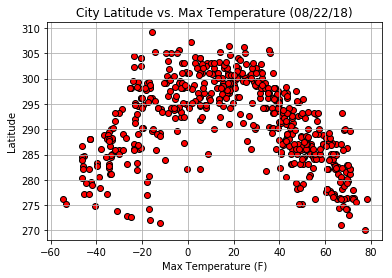

In [8]:
# Latitude vs Temp
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color="r", edgecolor="k")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid()

plt.savefig("Images/City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

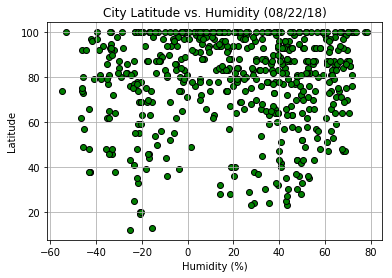

In [9]:
# Latitude vs humidity
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color="g", edgecolor="k")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()

plt.savefig("Images/City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

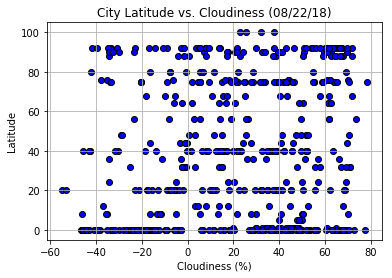

In [10]:
# Latitude vs cloudiness
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color="b", edgecolor="k")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()

plt.savefig("Images/City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

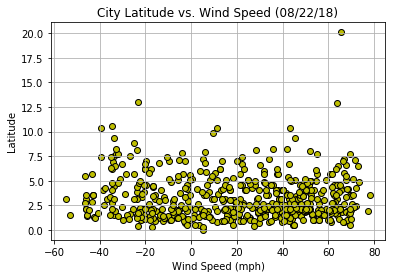

In [11]:
# Latitude vs wind speed
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color="y", edgecolor="k")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()

plt.savefig("Images/City Latitude vs. Wind Speed.png")
plt.show()

# Observation

* For the city that is closer to the equator show significantly warmer weather. 
* For the city that is closer to the equator also show less humidity. 
* Due to the warmer weather for those city that is closwer to equator, wind speed tend to be higher because air temperature affect air current. 
* There is no clear indication show the relationship between latitude and temperarture. 